In [58]:
import pygad # https://pypi.org/project/pygad/
import sys
import math
import numpy
# 將二進位陣列轉換成十進位數字
def convert_to_decimal(binary_arr):
    binary_str = "".join(str(int(x)) for x in binary_arr) # 串接陣列內各元素，組成二進位字串
    #print("convert_to_decimal",binary_str,binary_arr)
    return int(binary_str, 2) # 二進位轉十進位

# 適合度函數
def fitness_func(solution, solution_idx):
    print(solution_idx,"solution:",solution)
    dec_val = convert_to_decimal(solution)
    # print('fitness_func()')
    # print(solution)
    # print(dec_val)

    if dec_val == 0:
        return sys.maxsize
    else:
        return 1 / math.pow(dec_val, 2)

# # 執行完 "選擇"(selection) 後的 callback
# def on_parents(ga_instance, selected_parents):
#     curr_generation = str(ga_instance.generations_completed)

#     print("世代 " + curr_generation + " 族群內個體 (on_parents)")
#     print(ga_instance.population)

#     print("從世代 " + curr_generation + " 挑選出的個體")
#     print(selected_parents)

# def on_crossover(ga_instance, offspring_crossover):
#     print("交配出的後代 (on_crossover)")
#     print(offspring_crossover)

# def on_mutation(ga_instance, offspring_mutation):
#     print("突變後的後代 (on_mutation)")
#     print(offspring_mutation)

# # 產生新族群後的 callback
# def on_generation(ga_instance):    
#     curr_generation = str(ga_instance.generations_completed)
#     print("世代 " + curr_generation + " 族群內個體 (on_generation)")
#     print(ga_instance.population)



# function_inputs = [4,-2,3.5,5,-11,-4.7]
# desired_output = 44

# def fitness_func(solution, solution_idx):
#     output = numpy.sum(solution*function_inputs)
#     fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
#     return fitness

fitness_function = fitness_func

def on_start(ga_instance):
    print("on_start()")

def on_fitness(ga_instance, population_fitness):
    print("on_fitness()")

def on_parents(ga_instance, selected_parents):
    print("on_parents()")

def on_crossover(ga_instance, offspring_crossover):
    print("on_crossover()")

def on_mutation(ga_instance, offspring_mutation):
    print("on_mutation()")

def on_generation(ga_instance):
    print("on_generation()")

def on_stop(ga_instance, last_population_fitness):
    print("on_stop()")



In [59]:
# 建立 GA 實體
ga_instance = pygad.GA(
                       # 產生初始族群
                       sol_per_pop = 50, # 族群內的個體數
                       num_genes = 8, # 個體內的基因數                       
                       gene_space = [0, 1], # 採二進位編碼

                       # 某族群，如 [
                       #               [0, 0, 0, 0, 0, 0, 1, 1], # 個體一 : 3
                       #               [0, 0, 0, 0, 0, 1, 0, 1], # 個體二 : 5 
                       #               .... 共 sol_per_pop 個個體
                       #           ]

                       # 選擇 (selection)
                       parent_selection_type = "rws", # 選擇方式

                       # 交配 (crossover)
                       num_parents_mating = 2, # 取幾個個體進行交配                    
                       crossover_probability = 0.8, # 交配機率
                       crossover_type = "single_point", # 交配方式

                       # 突變 (mutation)
                       mutation_probability = 0.6, # 突變機率
                       mutation_type = "random", # 突變方式
                       mutation_percent_genes = 10, # 欲突變的基因比例

                       # 適應度函數
                       fitness_func = fitness_func,

                       num_generations = 30, # 跑幾個世代

                    # callback
                    #    on_parents = on_parents,
                    #    on_crossover = on_crossover,
                    #    on_mutation = on_mutation,
                    #    on_generation = on_generation
                    )
ga_instance.run() # 執行 GA

# ga_instance.plot_result() # 繪製各世代的適應度趨勢

# 取得最佳解
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("最佳解 : {solution}".format(solution = convert_to_decimal(solution)))
print("最佳解的適應度 : {solution_fitness}".format(solution_fitness = solution_fitness))

if ga_instance.best_solution_generation != -1:
    print("最佳解落在第 {best_solution_generation} 個世代".format(best_solution_generation = ga_instance.best_solution_generation))

print("\n\n\n")

solution: [0. 0. 1. 1. 1. 1. 0. 1.]
37 solution: [0. 1. 0. 1. 0. 0. 1. 0.]
38 solution: [1. 1. 0. 0. 1. 1. 0. 1.]
39 solution: [1. 1. 0. 0. 0. 1. 0. 0.]
40 solution: [1. 1. 1. 1. 0. 1. 0. 0.]
41 solution: [0. 1. 0. 1. 1. 0. 0. 0.]
42 solution: [0. 0. 1. 0. 1. 0. 1. 0.]
43 solution: [1. 0. 0. 1. 1. 1. 1. 0.]
44 solution: [1. 0. 1. 0. 1. 1. 1. 0.]
45 solution: [1. 0. 1. 0. 0. 1. 1. 1.]
46 solution: [1. 0. 0. 0. 1. 0. 1. 1.]
47 solution: [1. 0. 1. 0. 1. 1. 1. 0.]
48 solution: [1. 1. 1. 1. 0. 1. 1. 0.]
49 solution: [1. 0. 0. 1. 1. 1. 0. 1.]
0 solution: [0. 0. 0. 0. 0. 0. 0. 0.]
1 solution: [0. 0. 0. 0. 0. 0. 0. 0.]
2 solution: [0. 1. 1. 1. 0. 1. 1. 1.]
3 solution: [1. 1. 1. 1. 1. 1. 1. 0.]
4 solution: [0. 1. 1. 1. 1. 1. 1. 1.]
5 solution: [1. 0. 0. 1. 1. 1. 1. 1.]
6 solution: [1. 0. 1. 1. 1. 1. 1. 0.]
7 solution: [1. 0. 1. 1. 0. 0. 1. 1.]
8 solution: [1. 0. 0. 1. 0. 1. 0. 1.]
9 solution: [1. 0. 0. 1. 0. 0. 0. 0.]
10 solution: [1. 1. 1. 1. 0. 0. 0. 0.]
11 solution: [1. 1. 0. 1. 0. 0. 0. 0.]

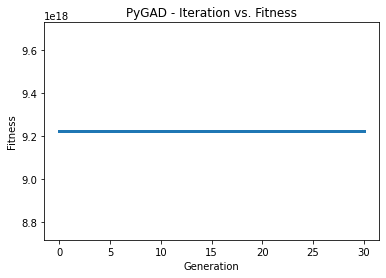

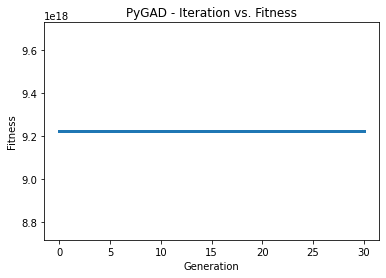

In [60]:
ga_instance.plot_result() # 繪製各世代的適應度趨勢

In [61]:
ga_instance = pygad.GA(num_generations=10,
                       num_parents_mating=2,
                       sol_per_pop=3,
                       num_genes=4,
                       fitness_func=fitness_function,

                       gene_space=[0, 1])
ga_instance.run() # 執行 GA                       

0 solution: [0. 1. 1. 1.]
1 solution: [1. 0. 0. 1.]
2 solution: [0. 1. 0. 0.]
0 solution: [0. 1. 0. 0.]
1 solution: [0. 1. 1. 1.]
2 solution: [0. 1. 1. 1.]
0 solution: [0. 1. 0. 0.]
1 solution: [0. 1. 1. 1.]
2 solution: [0. 0. 1. 1.]
0 solution: [0. 0. 1. 1.]
1 solution: [0. 1. 0. 0.]
2 solution: [0. 1. 0. 1.]
0 solution: [0. 0. 1. 1.]
1 solution: [0. 1. 0. 0.]
2 solution: [0. 0. 0. 0.]
0 solution: [0. 0. 0. 0.]
1 solution: [0. 0. 1. 1.]
2 solution: [0. 1. 1. 1.]
0 solution: [0. 0. 0. 0.]
1 solution: [0. 0. 1. 1.]
2 solution: [0. 0. 1. 1.]
0 solution: [0. 0. 0. 0.]
1 solution: [0. 0. 1. 1.]
2 solution: [0. 0. 1. 0.]
0 solution: [0. 0. 0. 0.]
1 solution: [0. 0. 1. 0.]
2 solution: [0. 0. 0. 1.]
0 solution: [0. 0. 0. 0.]
1 solution: [0. 0. 0. 1.]
2 solution: [1. 0. 0. 1.]
0 solution: [0. 0. 0. 0.]
1 solution: [0. 0. 0. 1.]
2 solution: [1. 0. 0. 1.]


In [62]:
solution

array([0., 0., 0., 0., 0., 0., 0., 0.])

TEST


In [78]:
import pygad # https://pypi.org/project/pygad/
import sys
import math
import numpy
from pandas import DataFrame
# 將二進位陣列轉換成十進位數字
def convert_to_decimal(binary_arr):
    binary_str = "".join(str(int(x)) for x in binary_arr) # 串接陣列內各元素，組成二進位字串
    #print("convert_to_decimal",binary_str,binary_arr)
    return int(binary_str, 2) # 二進位轉十進位

# 適合度函數
def fitness_func(solution, solution_idx):
    print(solution_idx,"solution:",solution)
    dec_val = convert_to_decimal(solution)
    # print('fitness_func()')
    # print(solution)
    # print(dec_val)

    if dec_val == 0:
        return sys.maxsize
    else:
        return 1 / math.pow(dec_val, 2)

# # 執行完 "選擇"(selection) 後的 callback
# def on_parents(ga_instance, selected_parents):
#     curr_generation = str(ga_instance.generations_completed)

#     print("世代 " + curr_generation + " 族群內個體 (on_parents)")
#     print(ga_instance.population)

#     print("從世代 " + curr_generation + " 挑選出的個體")
#     print(selected_parents)

# def on_crossover(ga_instance, offspring_crossover):
#     print("交配出的後代 (on_crossover)")
#     print(offspring_crossover)

# def on_mutation(ga_instance, offspring_mutation):
#     print("突變後的後代 (on_mutation)")
#     print(offspring_mutation)

# # 產生新族群後的 callback
# def on_generation(ga_instance):    
#     curr_generation = str(ga_instance.generations_completed)
#     print("世代 " + curr_generation + " 族群內個體 (on_generation)")
#     print(ga_instance.population)



# function_inputs = [4,-2,3.5,5,-11,-4.7]
# desired_output = 44

# def fitness_func(solution, solution_idx):
#     output = numpy.sum(solution*function_inputs)
#     fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
#     return fitness

fitness_function = fitness_func

def on_start(ga_instance):
    print("on_start()")

def on_fitness(ga_instance, population_fitness):
    print("on_fitness()")

def on_parents(ga_instance, selected_parents):
    print("on_parents()")

def on_crossover(ga_instance, offspring_crossover):
    print("on_crossover()")

def on_mutation(ga_instance, offspring_mutation):
    print("on_mutation()")

def on_generation(ga_instance):
    print("on_generation()")

def on_stop(ga_instance, last_population_fitness):
    print("on_stop()")

def callback_gen(ga_instance):
    print("@@Generation : ", ga_instance.generations_completed)
    print("@@Fitness of the best solution :", ga_instance.best_solution()[1])

In [79]:
# et = -1
# n_sect = 174
# population_size = 500
# num_parents_mating = 4 
# num_generations = 1000
# mutation_percent = 5
# parent_selection_type = "rank"
# crossover_type = "two_points"
# mutation_type = "random"
# keep_parents = 1
# init_range_low = -2
# init_range_high = 5
# n_div = 15

In [95]:
def distance_between( locationPre ,location):
        #assert isinstance(locationPre, location)
        # print(a)
        # print(b)
        return ((locationPre[0] - location[0]) ** 2 + (locationPre[1] - location[1]) ** 2) ** (1 / 2)


def create_locations():
    locations = []
    xs = [8, 50, 18, 35, 90, 40, 84, 74, 34, 40, 60, 74]
    ys = [3, 62, 0, 25, 89, 71, 7, 29, 45, 65, 69, 47]
    cities = ['Z', 'P', 'A', 'K', 'O', 'Y', 'N', 'X', 'G', 'Q', 'S', 'J']
    # for x, y, name in zip(xs, ys, cities):
    #     locations.append(Location(name, x, y))
    return list(zip(xs, ys, cities)),DataFrame (list(zip(xs, ys, cities)),columns=['xs','ys','city']), xs, ys, cities
my_locs,df, xs, ys, cities = create_locations()
# print(df.loc[0])
print(df.loc[:]) 
 
distance_between(df.loc[1],df.loc[0])

    xs  ys city
0    8   3    Z
1   50  62    P
2   18   0    A
3   35  25    K
4   90  89    O
5   40  71    Y
6   84   7    N
7   74  29    X
8   34  45    G
9   40  65    Q
10  60  69    S
11  74  47    J


72.42237223399962

In [107]:
df_location=df
def fitness_func(solution, solution_idx):
    # solution[i] represeent the value of the (i+1)th parameter in solution
    print("fitness_func",solution,solution_idx)
    global df_location
    
    print(df_location)
    for idx in solution:
        print(idx)
    fitness =pow((solution[0]-2),2)+pow((solution[1]-4),2)
     
    return fitness
ga_instance = pygad.GA(num_generations=10,
                        
                       sol_per_pop=3, # Population size.sol_per_pop : Number of solutions (i.e. chromosomes) within the population. 
                       num_genes=12,
                       fitness_func=fitness_func,

                       init_range_low=1,
                       init_range_high=12,
                       
# 選擇 (selection)
                       parent_selection_type = "rws", # 選擇方式

                       # 交配 (crossover)
                       num_parents_mating = 2, # 取幾個個體進行交配                    
                       crossover_probability = 0.8, # 交配機率
                       crossover_type = "single_point", # 交配方式

                       # 突變 (mutation)
                       mutation_probability = 0.6, # 突變機率
                       mutation_type = "random", # 突變方式
                       mutation_percent_genes = 10, # 欲突變的基因比例


                       gene_type=int,
                       
                       on_parents = on_parents,
                       on_crossover = on_crossover,
                       on_mutation = on_mutation,
                       on_generation = on_generation,
                       callback_generation = callback_gen
                       )

print(ga_instance.initial_population)
ga_instance.run() # 執行 GA
# 取得最佳解
solution, solution_fitness, solution_idx = ga_instance.best_solution()

print("ga_instance.population",ga_instance.population)
print("最佳解 : {solution}".format(solution = solution))
print("最佳解的適應度 : {solution_fitness}".format(solution_fitness = solution_fitness))

if ga_instance.best_solution_generation != -1:
    print("最佳解落在第 {best_solution_generation} 個世代".format(best_solution_generation = ga_instance.best_solution_generation))

print("\n\n\n")

[[ 8  8  2  6  8  4  3  2  4 11  3  2]
 [ 4  2  2  4  8  5  3  5 10  1  7  2]
 [ 2  7  9  8  3  3 11 10  3  4  5  4]]
fitness_func [ 8  8  2  6  8  4  3  2  4 11  3  2] 0
    xs  ys city
0    8   3    Z
1   50  62    P
2   18   0    A
3   35  25    K
4   90  89    O
5   40  71    Y
6   84   7    N
7   74  29    X
8   34  45    G
9   40  65    Q
10  60  69    S
11  74  47    J
fitness_func [ 4  2  2  4  8  5  3  5 10  1  7  2] 1
    xs  ys city
0    8   3    Z
1   50  62    P
2   18   0    A
3   35  25    K
4   90  89    O
5   40  71    Y
6   84   7    N
7   74  29    X
8   34  45    G
9   40  65    Q
10  60  69    S
11  74  47    J
fitness_func [ 2  7  9  8  3  3 11 10  3  4  5  4] 2
    xs  ys city
0    8   3    Z
1   50  62    P
2   18   0    A
3   35  25    K
4   90  89    O
5   40  71    Y
6   84   7    N
7   74  29    X
8   34  45    G
9   40  65    Q
10  60  69    S
11  74  47    J
on_parents()
on_crossover()
on_mutation()
@@Generation :  1
fitness_func [ 8  8  2  6  8  4  3  2  